In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
!pip install scikit-learn



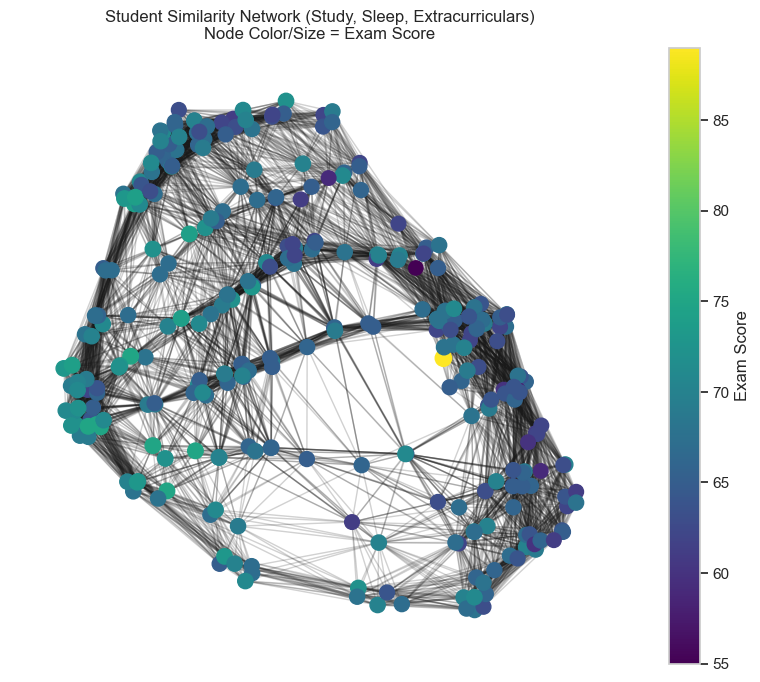

Graph Summary:
• Number of nodes: 6607
• Number of edges: 3188374
• Average degree: 965.15
• Number of connected components: 1
• Size of largest component: 6607
• Number of isolated nodes: 0


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


from matplotlib.cm import ScalarMappable

# Load your dataset (make sure the file is in your working directory)
df = pd.read_csv('StudentPerformanceFactors.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Encode extracurriculars as binary
df['Extracurricular_Binary'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

# Drop rows with missing data in selected features
subset = ['Hours_Studied', 'Sleep_Hours', 'Extracurricular_Binary', 'Exam_Score']
df_clean = df[subset].dropna().reset_index(drop=True)

# Standardize Hours_Studied and Sleep_Hours
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_clean[['Hours_Studied', 'Sleep_Hours']])
behavior_vectors = np.hstack((standardized_features, df_clean[['Extracurricular_Binary']].values))

# Compute cosine similarity matrix
cos_sim = cosine_similarity(behavior_vectors)

# Create graph: nodes = students, edges = similarity ≥ threshold
threshold = 0.8
n_students = len(df_clean)
G = nx.Graph()
G.add_nodes_from(range(n_students))

for i in range(n_students):
    for j in range(i + 1, n_students):
        if cos_sim[i, j] >= threshold:
            G.add_edge(i, j)

# Assign exam score as node attribute
for i in range(n_students):
    G.nodes[i]['exam_score'] = df_clean.loc[i, 'Exam_Score']

# Sample subgraph of 300 students
np.random.seed(42)
sample_nodes = np.random.choice(G.nodes, size=300, replace=False)
subG = G.subgraph(sample_nodes)

# Get color and size based on exam scores
node_colors = [subG.nodes[n]['exam_score'] for n in subG.nodes]
node_sizes = [50 + subG.nodes[n]['exam_score'] for n in subG.nodes]

# Draw network
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42)

nodes = nx.draw_networkx_nodes(
    subG, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.viridis,
    ax=ax
)
nx.draw_networkx_edges(subG, pos, alpha=0.2, ax=ax)

# Colorbar with correct axes
sm = ScalarMappable(cmap=plt.cm.viridis)
sm.set_array(node_colors)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Exam Score')

ax.set_title("Student Similarity Network (Study, Sleep, Extracurriculars)\nNode Color/Size = Exam Score")
ax.set_axis_off()
plt.show()

# Get graph summary stats
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
num_components = nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_size = len(largest_cc)
isolated_nodes = list(nx.isolates(G))
num_isolated = len(isolated_nodes)

# Print nicely
print("Graph Summary:")
print(f"• Number of nodes: {num_nodes}")
print(f"• Number of edges: {num_edges}")
print(f"• Average degree: {avg_degree:.2f}")
print(f"• Number of connected components: {num_components}")
print(f"• Size of largest component: {largest_cc_size}")
print(f"• Number of isolated nodes: {num_isolated}")


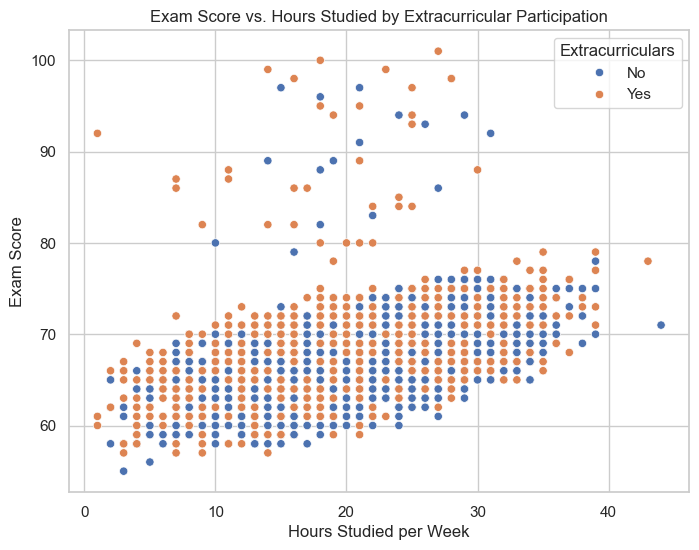

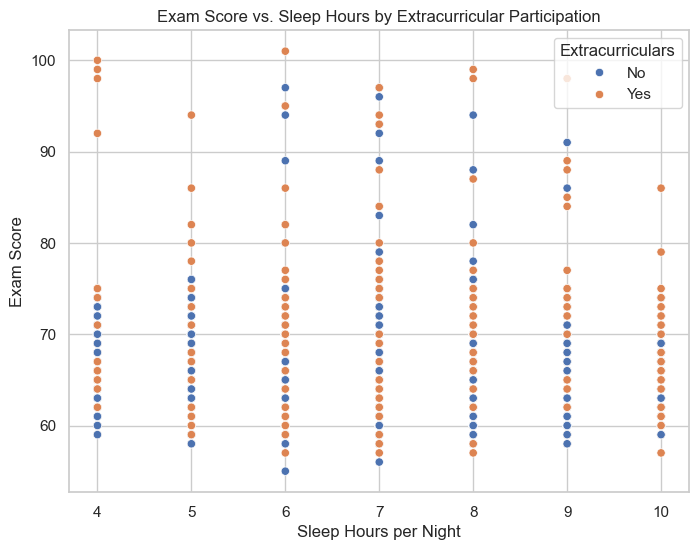

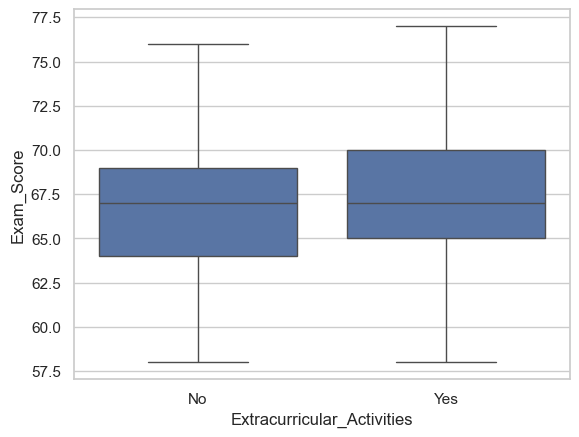

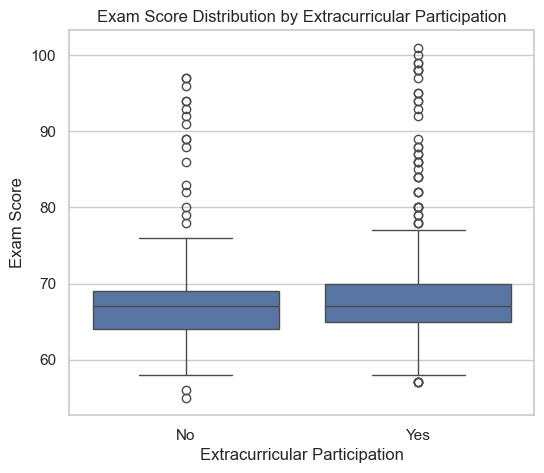

In [30]:
!pip install seaborn
import pandas as pd
import seaborn as sns


# Load real dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Set visual style
sns.set(style="whitegrid")

# Scatter plot: Hours Studied vs. Exam Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Extracurricular_Activities')
plt.title('Exam Score vs. Hours Studied by Extracurricular Participation')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Exam Score')
plt.legend(title='Extracurriculars')
plt.show()

# Scatter plot: Sleep Hours vs. Exam Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Sleep_Hours', y='Exam_Score', hue='Extracurricular_Activities')
plt.title('Exam Score vs. Sleep Hours by Extracurricular Participation')
plt.xlabel('Sleep Hours per Night')
plt.ylabel('Exam Score')
plt.legend(title='Extracurriculars')
plt.show()

# Boxplot: Exam Score by Extracurricular Participation
sns.boxplot(data=data, x='Extracurricular_Activities', y='Exam_Score', showfliers=False)

plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x='Extracurricular_Activities', y='Exam_Score')
plt.title('Exam Score Distribution by Extracurricular Participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.show()


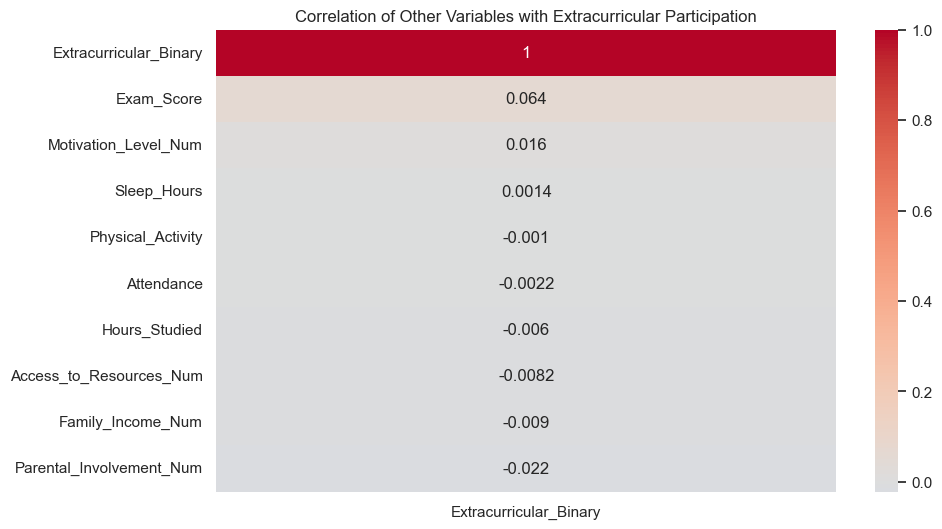

Full Correlation Matrix:
                           Extracurricular_Binary  Hours_Studied  Sleep_Hours  \
Extracurricular_Binary                     1.000         -0.006        0.001   
Hours_Studied                             -0.006          1.000        0.011   
Sleep_Hours                                0.001          0.011        1.000   
Exam_Score                                 0.064          0.445       -0.017   
Parental_Involvement_Num                  -0.022         -0.016       -0.008   
Access_to_Resources_Num                   -0.008         -0.005       -0.015   
Motivation_Level_Num                       0.016         -0.010        0.001   
Attendance                                -0.002         -0.010       -0.016   
Physical_Activity                         -0.001          0.005       -0.000   
Family_Income_Num                         -0.009          0.001       -0.019   

                          Exam_Score  Parental_Involvement_Num  \
Extracurricular_Binary     

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the real dataset
df = pd.read_csv('StudentPerformanceFactors.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Encode categorical variables
df['Extracurricular_Binary'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Parental_Involvement_Num'] = df['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Access_to_Resources_Num'] = df['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Motivation_Level_Num'] = df['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Family_Income_Num'] = df['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Select relevant columns
correlation_vars = [
    'Extracurricular_Binary', 'Hours_Studied', 'Sleep_Hours', 'Exam_Score',
    'Parental_Involvement_Num', 'Access_to_Resources_Num', 'Motivation_Level_Num',
    'Attendance', 'Physical_Activity', 'Family_Income_Num'
]

# Drop rows with missing values in selected columns
df_clean = df[correlation_vars].dropna()

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Plot heatmap of correlation with extracurriculars
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix[['Extracurricular_Binary']].sort_values(by='Extracurricular_Binary', ascending=False),
    annot=True, cmap='coolwarm', center=0, cbar=True
)
plt.title('Correlation of Other Variables with Extracurricular Participation')
plt.show()

# Optional: Print full matrix
print("Full Correlation Matrix:\n", corr_matrix.round(3))
